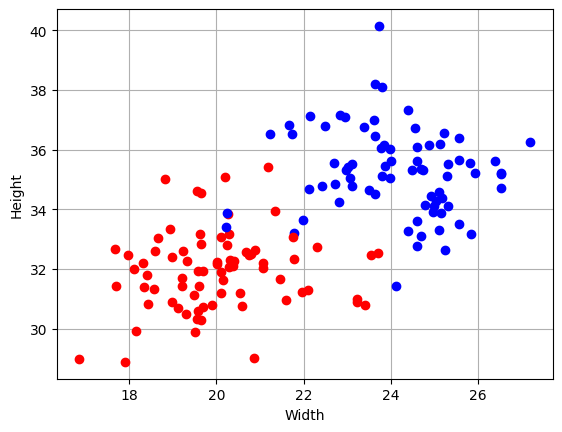

In [5]:
import matplotlib.pyplot as plt
import math

with open("datapoints.txt", "r") as f_read:

    data = f_read.readlines()
    data = data[1:]

    data_points = [i.replace("\n", "") for i in data]
    data_points = [i.split(",") for i in data_points]
    
    # converting strings from "datapoints.txt" to floats
    clean_data_points = []
    for i in data_points:
        clean_data_points.append([float(i[0]), float(i[1]), float(i[2])])

    # plotting data points after cleaning them
    for i in range(len(clean_data_points)):
        if clean_data_points[i][2] == 0:
            plt.plot(clean_data_points[i][0], clean_data_points[i][1], 'o', color = "red")
        elif clean_data_points[i][2] == 1:
            plt.plot(clean_data_points[i][0], clean_data_points[i][1], 'o', color = "blue")
        
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid()

    # print(clean_data_points)
    
with open("testpoints.txt", "r") as f:

    test_points = f.readlines()
    test_points = test_points[1:]
    test_points = [i.replace("\n", "") for i in test_points]
    test_points = [i.split(". ") for i in test_points]

    new_list = []
    for i in test_points:
        lst = i[1]
        new_list.append(lst)

    new_list = [i.strip("(") for i in new_list]
    new_list = [i.strip(")") for i in new_list]
    new_list = [i.split(" ,") for i in new_list]
    new_list = [i[0].split(", ") for i in new_list] 
    
    clean_test_points = []
    for i in new_list:
            clean_test_points.append([float(i[0]), float(i[1])])
    
    # print(clean_test_points)



In [6]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

for i in clean_test_points:
    distances = []
    for j in clean_data_points:
        # calculate the distance between the test points and data points
        distances.append(distance(i[0], i[1], j[0], j[1]))
    
    # find the minimum distance
    min_dist = min(distances)
    # find out the index of the minimum distance
    index = distances.index(min_dist)

    # closest point is classified as Pichu, otherwise it's Pikachu
    if clean_data_points[index][2] == 0:
        print(f"({i[0]}, {i[1]}) is classified as Pichu")
    else:
        print(f"({i[0]}, {i[1]}) is classified as Pikachu")

(25.0, 32.0) is classified as Pikachu
(24.2, 31.5) is classified as Pikachu
(22.0, 34.0) is classified as Pikachu
(20.5, 34.0) is classified as Pichu


In [7]:
def user_input():
    while True:
        try:
            width = float(input("Enter width: "))
            height = float(input("Enter height: "))
            if width < 0 or height < 0: # error handling for negative numbers
                print("Neither width nor height can be negative")
                continue # go back to the beginning of the loop
            else: # if the user enters a valid input
                break # break out of the loop
        except ValueError as err:
            print("Width and height should be numbers")
    return width, height

In [8]:
def classify(width, height):
    distances = []
    for i in clean_data_points:
        distances.append(distance(width, height, i[0], i[1]))

    min_dist = min(distances)
    index = distances.index(min_dist)

    if clean_data_points[index][2] == 0:
        print(f"({width}, {height}) is classified as Pichu")
    else:
        print(f"({width}, {height}) is classified as Pikachu")

# unpack the values returned by the user_input with the star operator and send them as 2 arguments to the classify function
classify(*user_input())

Neither width nor height can be negative
Width and height should be numbers
(32.0, 32.0) is classified as Pikachu
